In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
_, __, files = next(os.walk('data'))

In [3]:
files = list(filter(lambda s: s.endswith('csv'),files))

In [4]:
print(files)

['albAmel001r19c.csv', 'albAmel001r2-9c.csv', 'albAmel001s1r1-9x.csv', 'albAmel001s1r2-9x.csv', 'albAmel010sTr1-8c.csv', 'albAmel010sTr1-8x.csv', 'albAmel100r1-11c.csv', 'albAmel100s1r1-11x.csv', 'anorShaws1r1-13mm-090119c.csv', 'byto000sA1r1-16mm-091519c.csv', 'byto000sA1r2-16mm-102619c.csv', 'byto000sA1r2-16mm-102619x.csv', 'byto000sB1r1-14c.csv', 'byto000sCr1-14c.csv', 'fmt001sAr1-11c.csv', 'fmt001sAr1-11x.csv', 'fmt010sCr1-8x.csv', 'fmt010sCr18c.csv', 'fmt100sBr1-10c.csv', 'fmt100sBr1-10x.csv', 'fmt100sBr2-10c.csv', 'fmt100sBr2-10mmx.csv', 'moon000s1r1-15mm-091219c.csv', 'moon000s1r2-15mm-091519c.csv', 'moon000s2r1-13c.csv', 'moon000s2r2-13c.csv', 'moon000s3r1-10c.csv', 'moon000s3r2-10c.csv', 'moon0p2s2r2-15mm-102719c.csv', 'oligHawk001s1r1-7c.csv', 'oligHawk001s1r1-7x.csv', 'oligHawk001s1r2-7c.csv', 'oligHawk001s1r2-7x.csv', 'oligHawk001s1r5-7c.csv', 'oligHawk010s1r3-8c.csv', 'oligHawk010s1r3-8x.csv', 'oligHawk010s1r4-8c.csv', 'oligHawk010s1r4-8x.csv', 'oligTanz010s2r1-9c.csv', 'o

In [5]:
df = pd.read_csv('data/'+files[0])
df.head()

Unnamed: 0  Temp./°C  Time/min     dL/Lo  Certificate  Standard  Corrected  \
0           0    22.734   0.00000  0.000024      0.00008 -0.000398   0.000502   
1           0    22.740   0.02167  0.000024      0.00008 -0.000398   0.000502   
2           0    22.738   0.04333  0.000024      0.00008 -0.000398   0.000503   
3           0    22.744   0.06500  0.000025      0.00008 -0.000398   0.000503   
4           0    22.732   0.08667  0.000024      0.00008 -0.000398   0.000503   

    delT  EngAlpha    Fitted     Alpha  
0  0.000       inf  0.000307  0.000001  
1  0.006  0.083713  0.000307  0.000001  
2  0.004  0.125702  0.000307  0.000001  
3  0.010  0.050287  0.000307  0.000001  
4 -0.002 -0.251406  0.000307  0.000001

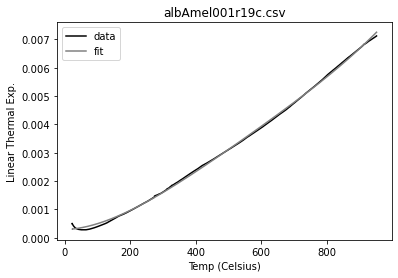

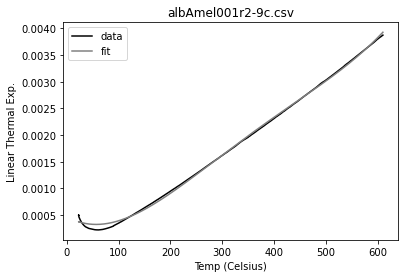

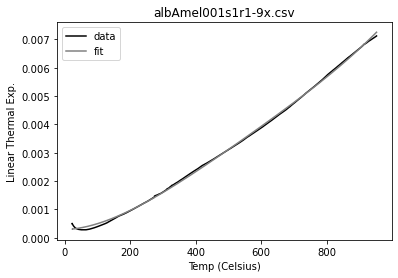

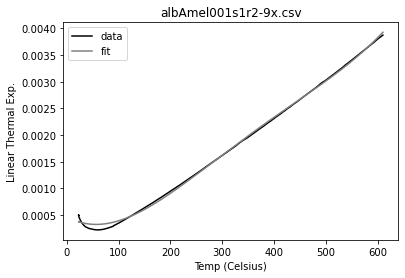

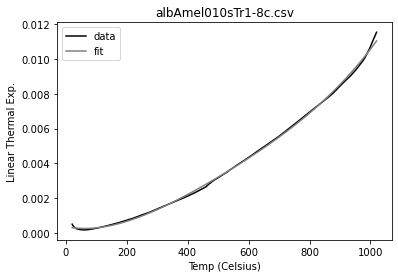

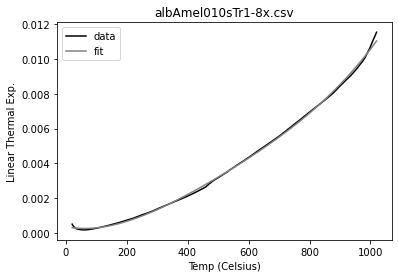

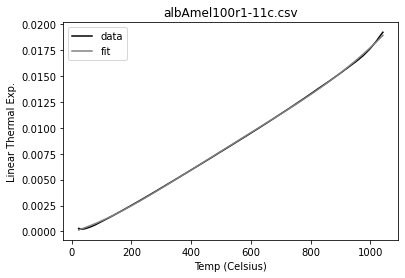

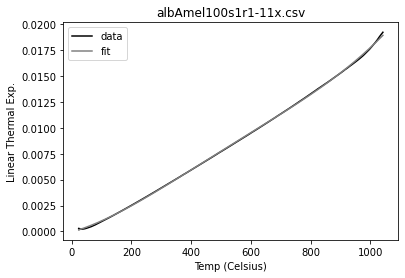

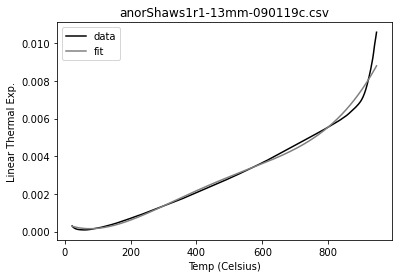

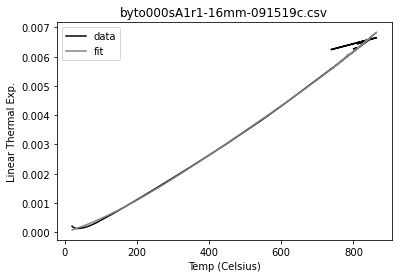

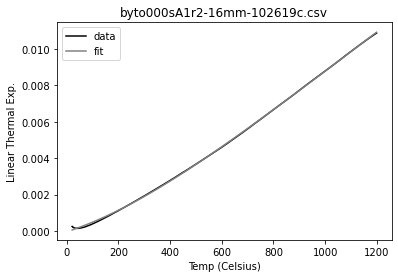

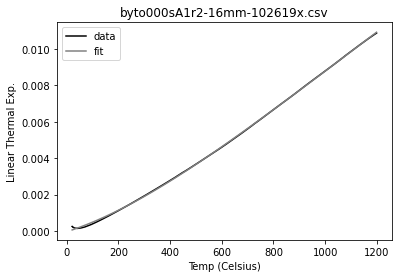

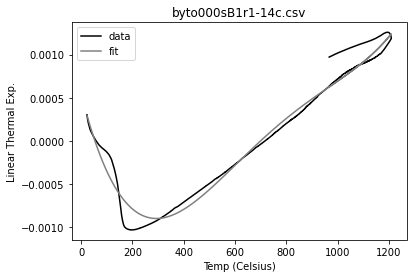

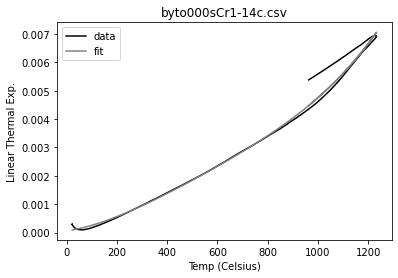

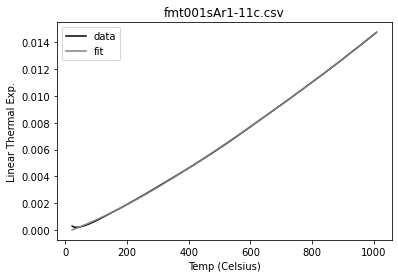

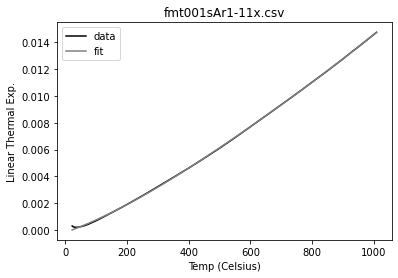

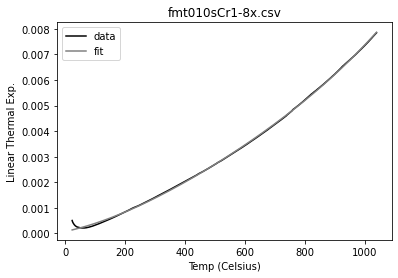

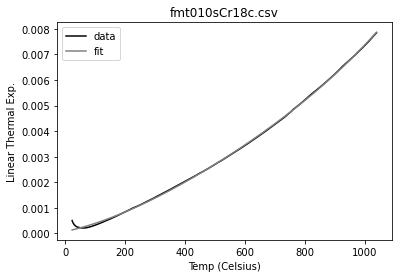

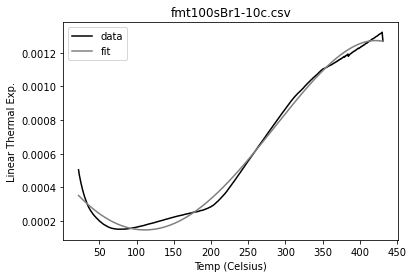

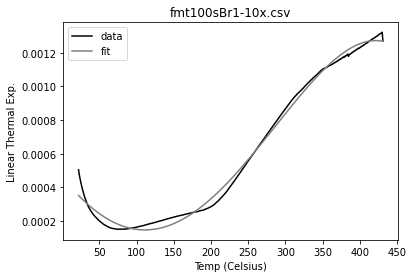

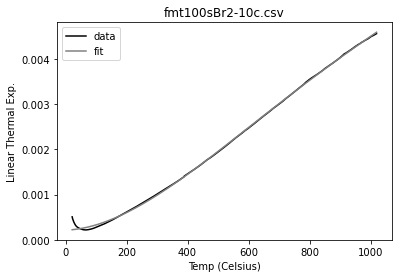

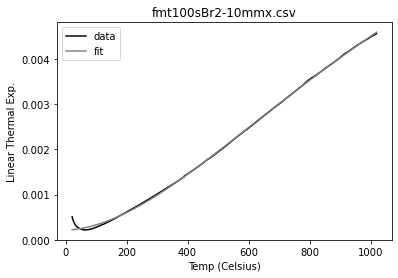

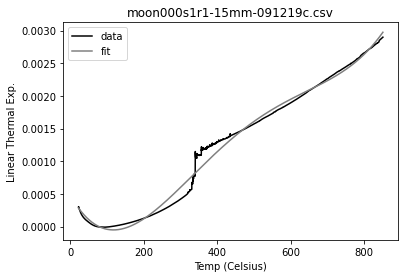

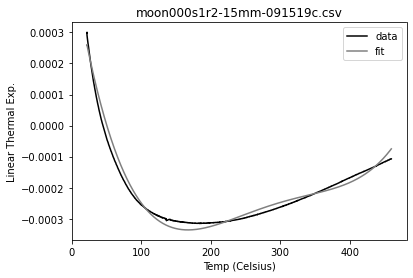

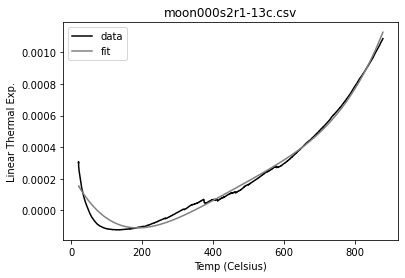

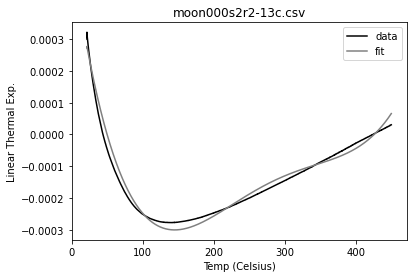

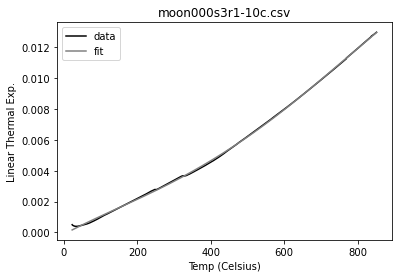

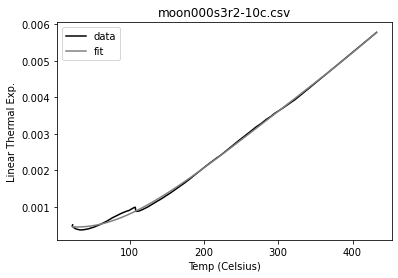

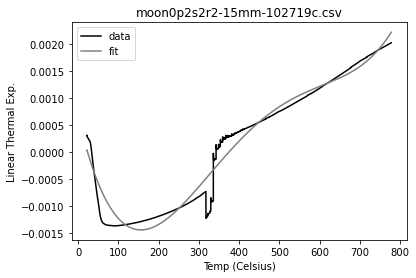

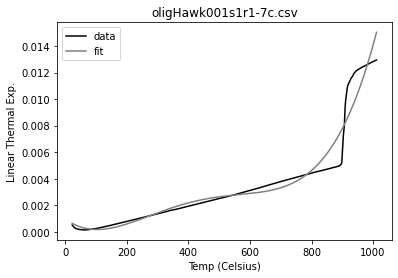

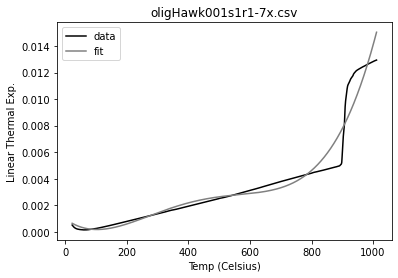

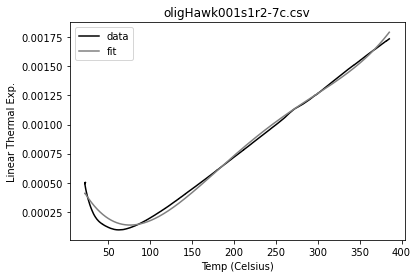

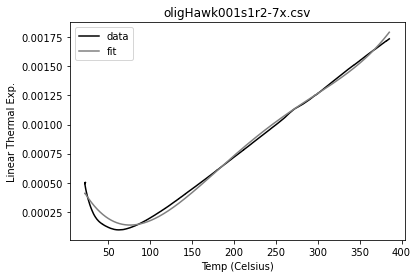

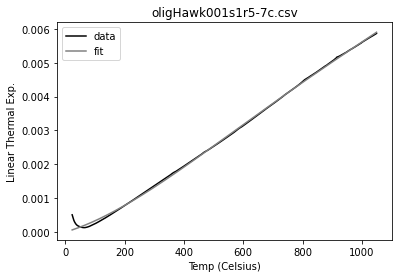

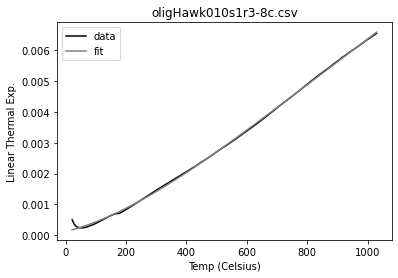

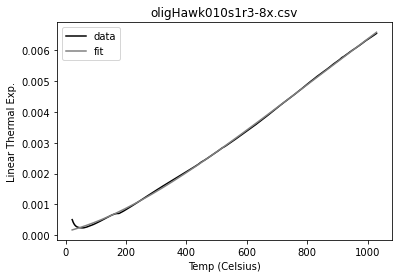

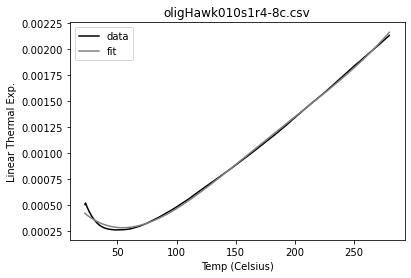

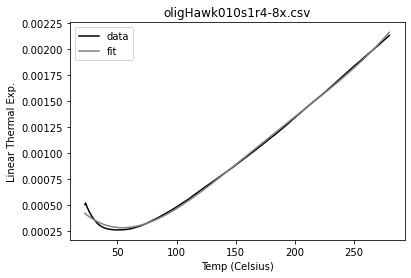

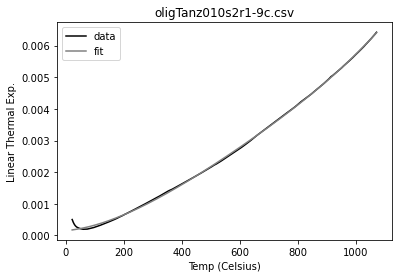

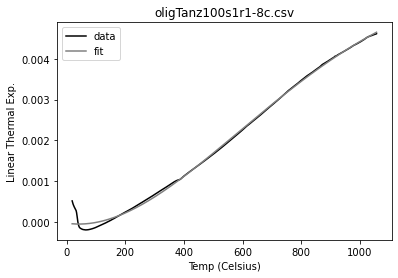

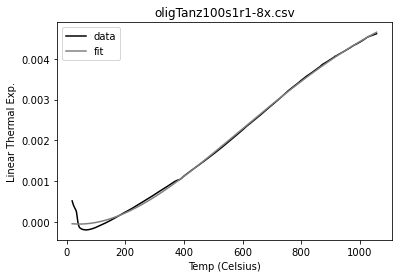

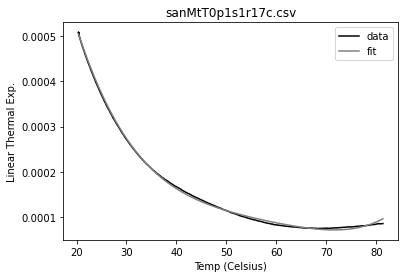

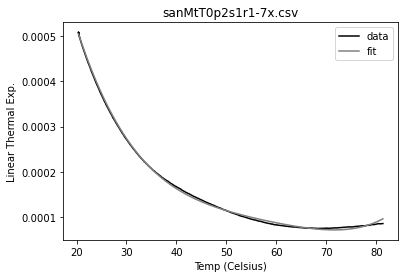

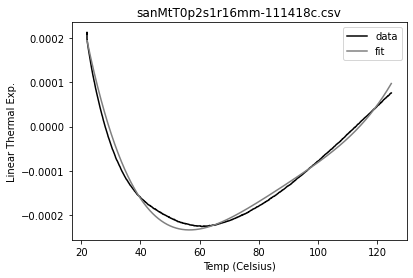

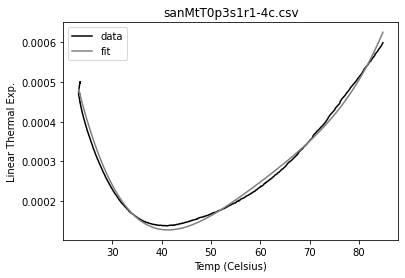

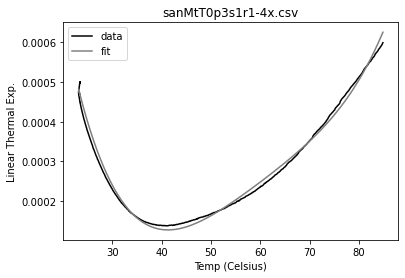

<Figure size 432x288 with 0 Axes>

In [8]:
for filename in files:
    df = pd.read_csv('data/'+filename)
    plt.plot(df.iloc[:,1],df['Corrected'],c='black',label='data')
    plt.plot(df.iloc[:,1],df['Fitted'],c='gray',label='fit')
    plt.title(filename)
    plt.xlabel('Temp (Celsius)')
    plt.ylabel('Linear Thermal Exp.')
    plt.legend()
    plt.savefig('testplots/'+filename[0:-3]+'tif')
    plt.show()
    plt.clf()

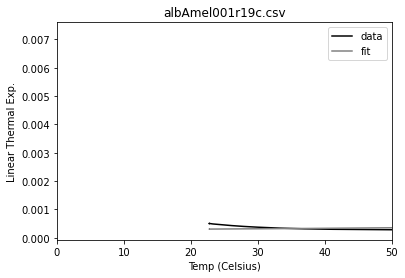

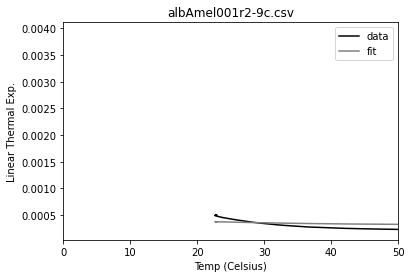

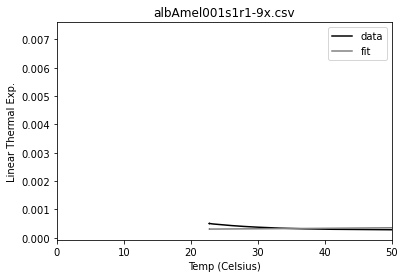

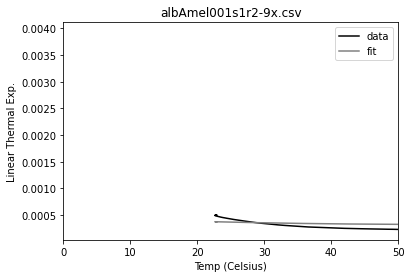

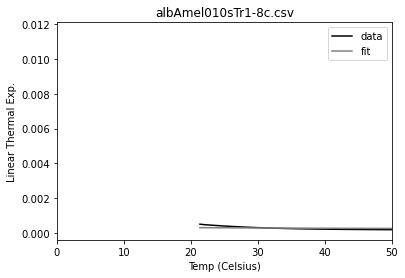

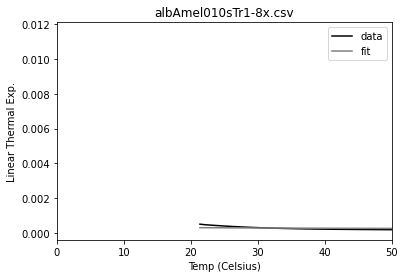

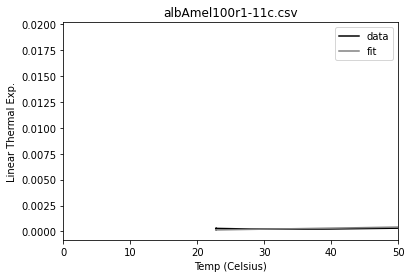

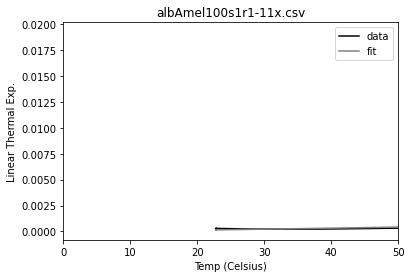

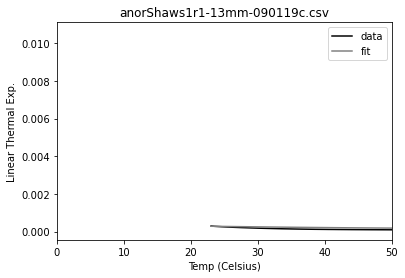

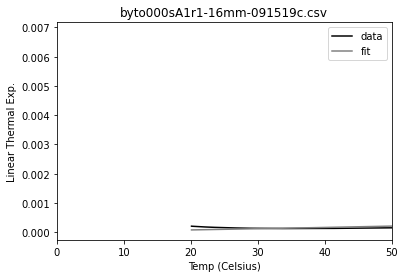

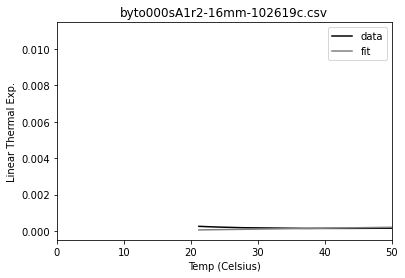

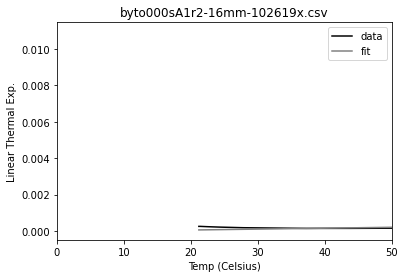

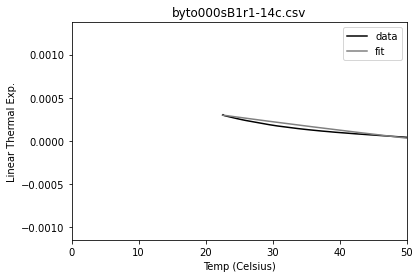

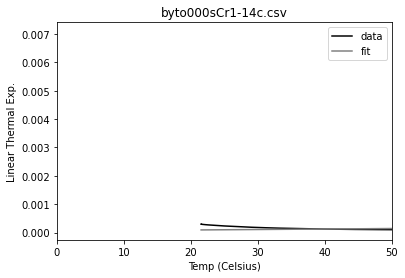

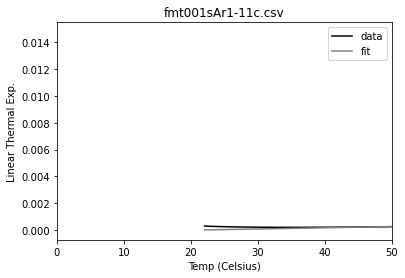

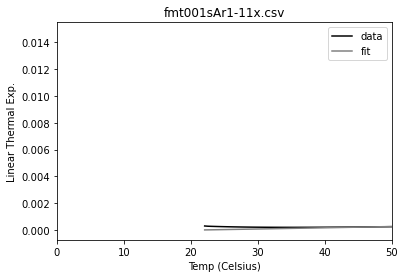

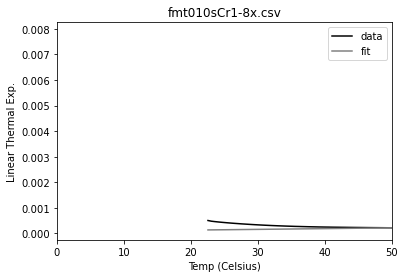

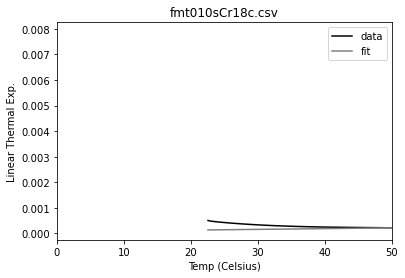

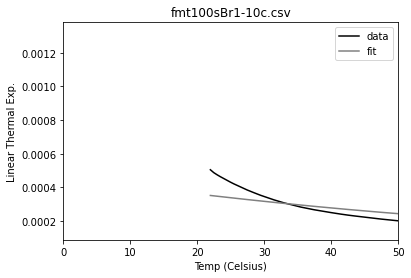

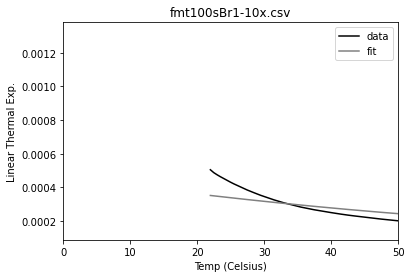

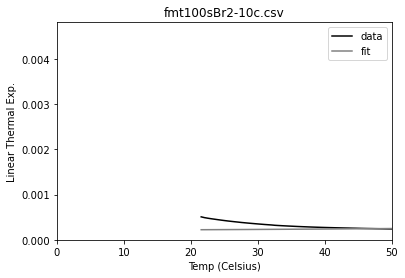

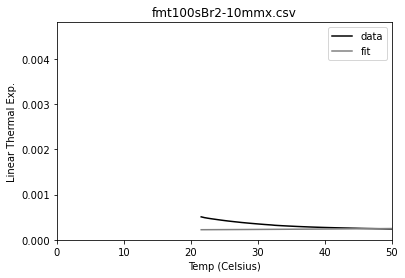

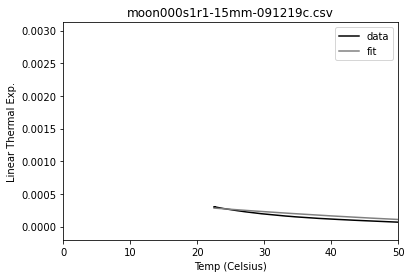

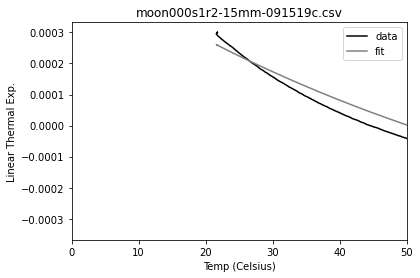

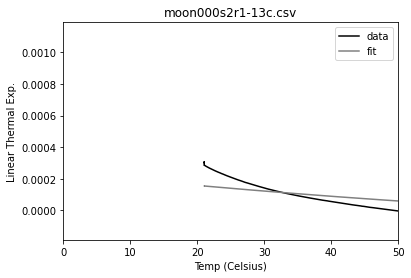

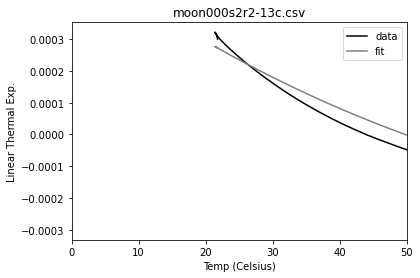

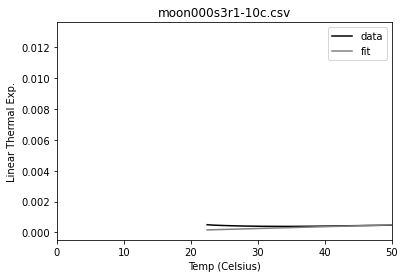

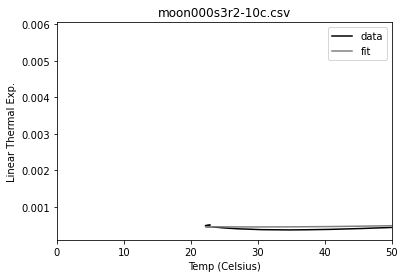

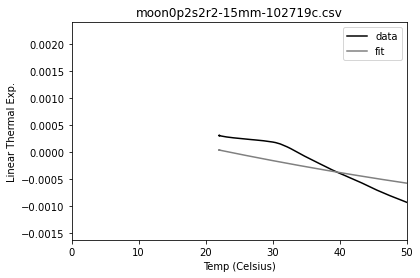

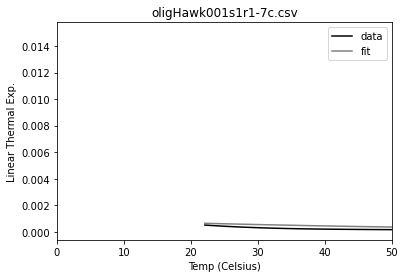

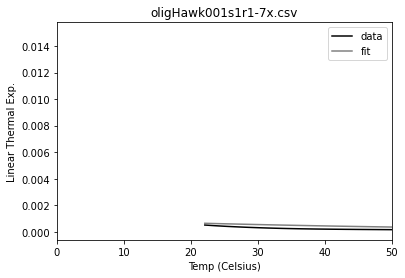

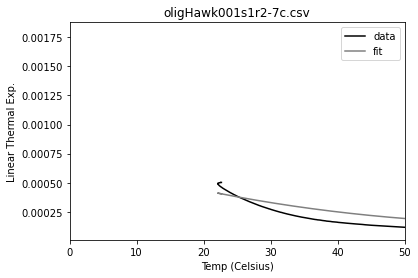

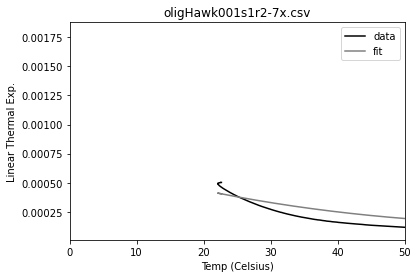

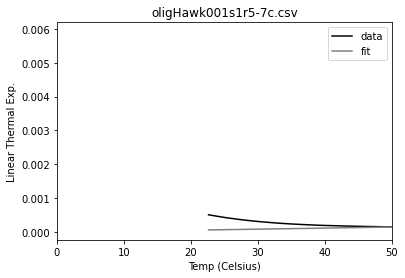

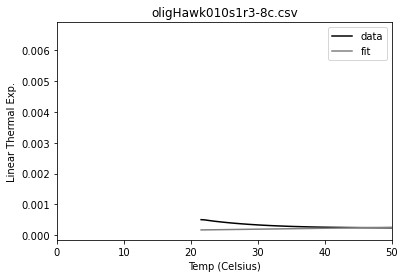

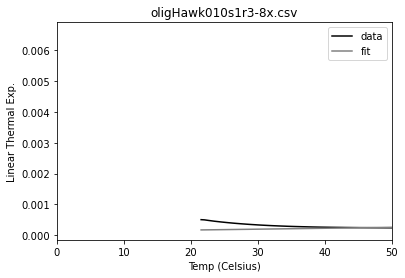

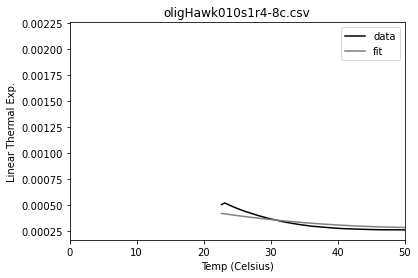

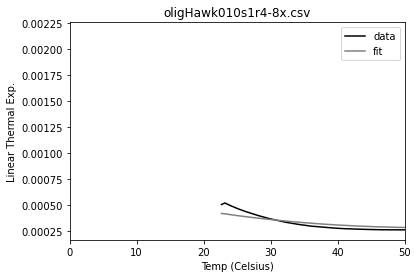

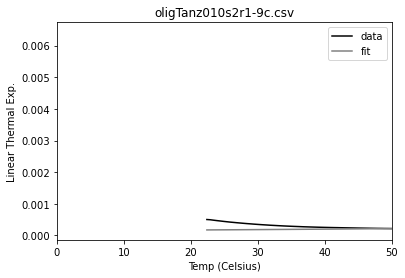

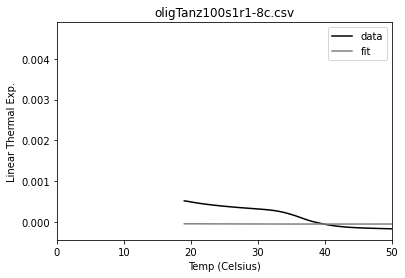

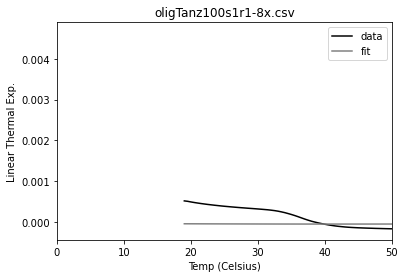

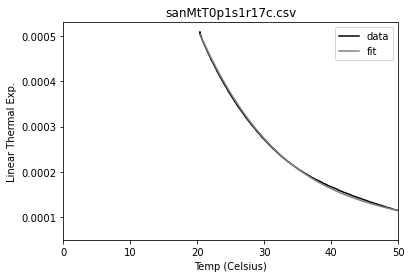

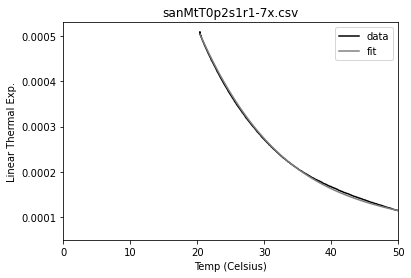

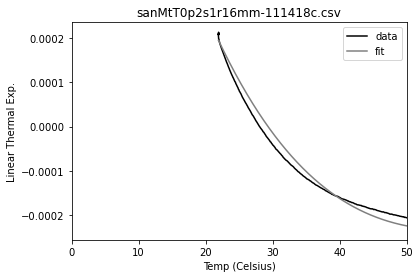

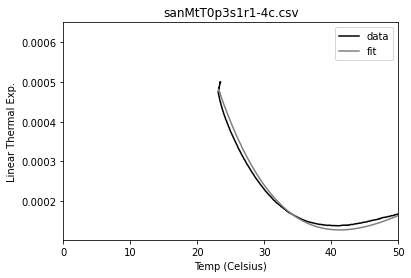

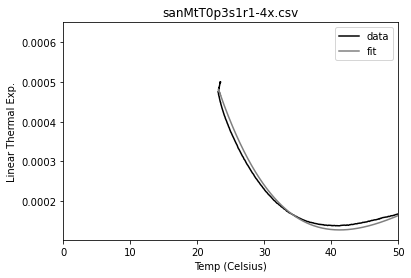

<Figure size 432x288 with 0 Axes>

In [13]:
for filename in files:
    df = pd.read_csv('data/'+filename)
    plt.xlim(0,50)
    plt.plot(df.iloc[:,1],df['Corrected'],c='black',label='data')
    plt.plot(df.iloc[:,1],df['Fitted'],c='gray',label='fit')
    plt.title(filename)
    plt.xlabel('Temp (Celsius)')
    plt.ylabel('Linear Thermal Exp.')
    plt.legend()
    plt.show()
    plt.clf()

In [10]:
df.index

RangeIndex(start=0, stop=13538, step=1)

In [12]:
df[100:105]

Unnamed: 0  Temp./°C  Time/min     dL/Lo  Certificate  Standard  \
100           0    22.769   2.16667  0.000028      0.00008 -0.000398   
101           0    22.767   2.18833  0.000028      0.00008 -0.000398   
102           0    22.769   2.21000  0.000028      0.00008 -0.000398   
103           0    22.768   2.23167  0.000028      0.00008 -0.000398   
104           0    22.768   2.25333  0.000028      0.00008 -0.000398   

     Corrected   delT  EngAlpha    Fitted     Alpha  
100   0.000506  0.035  0.014468  0.000307  0.000001  
101   0.000507  0.033  0.015349  0.000307  0.000001  
102   0.000506  0.035  0.014459  0.000307  0.000001  
103   0.000506  0.034  0.014886  0.000307  0.000001  
104   0.000506  0.034  0.014878  0.000307  0.000001

In [14]:
df.columns

Index(['Unnamed: 0', 'Temp./�C', 'Time/min', 'dL/Lo', 'Certificate',
       'Standard', 'Corrected', 'delT', 'EngAlpha', 'Fitted', 'Alpha'],
      dtype='object')

In [15]:
df.columns[1]

'Temp./�C'

In [16]:
df.index.max()

802

In [21]:
# Wow, that's ugly for some of those files.
# Must get rid of the non-monotonically increasing temp stretches of the data.
def cutback(df):
    temp = df.columns[0]
    status = 'beginning'
    max = df.index.max()
    for index in df.index:
        if status == 'beginning':
            if df.loc[index,temp] < 30:
                df.drop(index,inplace=True)
            else:
                status='main'
        else:
            if df.loc[index,temp] < df.loc[index+1,temp]:
                df.drop(list(range(index,max+1)))
                break
    return df

albAmel001r19c.csv


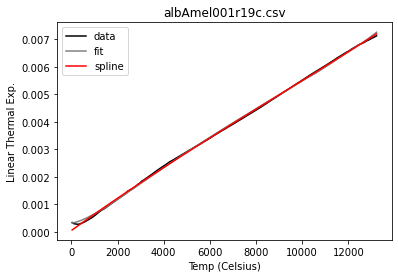

albAmel001r2-9c.csv


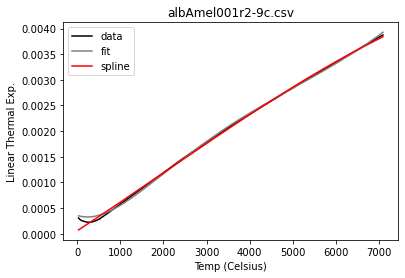

albAmel001s1r1-9x.csv


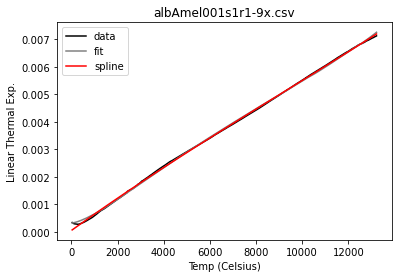

albAmel001s1r2-9x.csv


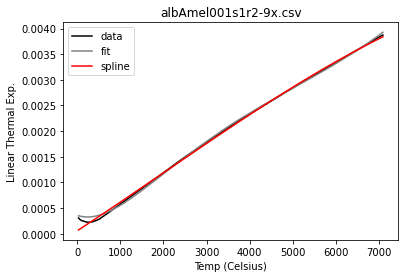

albAmel010sTr1-8c.csv


error: (m>k) failed for hidden m: fpcurf0:m=0

In [23]:
import scipy.interpolate as intp
for filename in files:
    df = pd.read_csv('data/'+filename)
    df.drop('Unnamed: 0',axis=1)
    temp=df.columns[0]
    print(filename, len(df))
    df = cutback(df)
    print(len(df))
    splin = intp.UnivariateSpline(df[temp],df['Corrected'])
    df['SplFit']=splin(df[temp])
    plt.plot(df[temp],df['Corrected'],c='black',label='data')
    plt.plot(df[temp],df['Fitted'],c='gray',label='fit')
    plt.plot(df[temp],df['SplFit'],c='r',label='spline')
    plt.title(filename)
    plt.xlabel('Temp (Celsius)')
    plt.ylabel('Linear Thermal Exp.')
    plt.legend()
    plt.savefig('testplots/'+filename[0:-3]+'tif')
    plt.show()
    plt.clf()
    df.to_csv('data/'+filename)

In [24]:
df.head()

Empty DataFrame
Columns: [Unnamed: 0, Temp./°C, Time/min, dL/Lo, Certificate, Standard, Corrected, delT, EngAlpha, Fitted, Alpha]
Index: []